<a href="https://colab.research.google.com/github/aditisspatil/chess_piece_classifier/blob/master/classifier_smaller_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chess Piece image classifier**

This is a smaller version of notebook, with less output image files. Saves time, space and data !

In [2]:
## make sure fastai is up to date 
!curl -s https://course.fast.ai/setup/colab | bash

bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'


In [3]:
## read in standard data science libs
import matplotlib.pyplot as plt

## import google drive package
from  google.colab import drive

## import the fastai library
from fastai.vision import *

## to enable multiple outputs from one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
## connect workbook to google drive folder to access images 
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
## save path to project folder 
root_path = '/content/drive/My Drive/ChessProject'

## save path for folder that contains images 
proj_path = 'drive/My Drive/ChessProject/Classifier'

**Load Data from folders**

In [6]:
## save fastai path 
pieces_path = Path(proj_path)/'Pieces'
colors_path = Path(proj_path)/'Colors'

In [7]:
## create image data bunch with 80/20 train test split 
np.random.seed(42)
pieces_data = ImageDataBunch.from_folder(pieces_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=200, num_workers=4).normalize(imagenet_stats)

colors_data = ImageDataBunch.from_folder(colors_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=200, num_workers=4).normalize(imagenet_stats)

In [8]:
## show classes and sample of images of pieces classifier dataset
pieces_data.classes, pieces_data.c, len(pieces_data.train_ds), len(pieces_data.valid_ds)
# pieces_data.show_batch(rows=3,figsize=(5,5))


(['bishop', 'king', 'knight', 'pawn', 'queen', 'rook'], 6, 1157, 289)

In [9]:
## show classes and sample of images of colors classifier dataset
colors_data.classes, colors_data.c, len(colors_data.train_ds), len(colors_data.valid_ds)
# colors_data.show_batch(rows=3,figsize=(5,5))

(['black', 'white'], 2, 344, 85)

**Train Pieces Model**

In [ ]:
## create cnn_learner object
## use resnet 50 for transfer learning
learn_pieces = cnn_learner(pieces_data, models.resnet50, metrics=error_rate)

In [ ]:
## train 30 epochs of the model 
learn_pieces.fit_one_cycle(30)

epoch,train_loss,valid_loss,error_rate,time
0,0.099780,0.340346,0.076125,00:11
1,0.107756,0.339767,0.072664,00:11
2,0.096451,0.318531,0.076125,00:10
3,0.087545,0.321339,0.069204,00:10
4,0.083171,0.316056,0.072664,00:10
5,0.079001,0.334435,0.083045,00:10
6,0.079909,0.373244,0.089965,00:10
7,0.072805,0.400474,0.083045,00:10
8,0.072433,0.349974,0.072664,00:10
9,0.073008,0.380889,0.086505,00:10


In [ ]:
## save model
learn_pieces.save('p_model1_50', return_path=True) # 0.027201	0.269896	0.076125

PosixPath('drive/My Drive/ChessProject/Classifier/Pieces/models/p_model1_50.pth')

In [ ]:
## unfreeze model. Lets you train earlier layers. 
learn_pieces.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


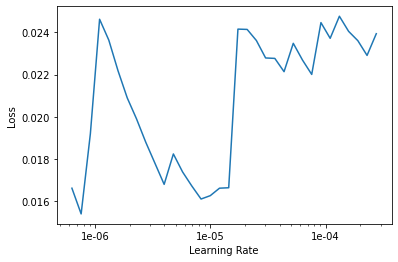

In [ ]:
## find optimal learning rates 
learn_pieces.lr_find()  
learn_pieces.recorder.plot()

In [ ]:
## fit whole model with new learning rates 
learn_pieces.fit_one_cycle(2, max_lr=slice(1e-6,1e-5), wd=.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.026654,0.236211,0.079585,00:11
1,0.020304,0.228946,0.065744,00:11


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


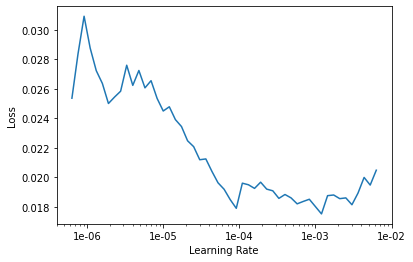

In [ ]:
learn_pieces.freeze()
learn_pieces.lr_find()
learn_pieces.recorder.plot()

In [ ]:
learn_pieces.save('p_model2_50', return_path=True)

PosixPath('drive/My Drive/ChessProject/Classifier/Pieces/models/p_model2_50.pth')

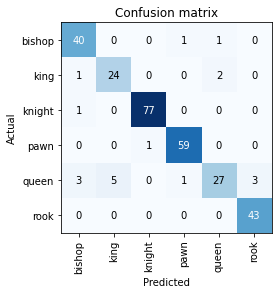

In [12]:
learn_pieces.load('p_model_50_bestfit'); #the best one yet, to comapre with current
# learn_pieces.load('p_model1_50'); #the current one for testing, without trained earlier layers
# learn_pieces.load('p_model2_50'); #the current one for testing, with trained earlier layers

## plot results of model on validation set 
interp = ClassificationInterpretation.from_learner(learn_pieces);
interp.plot_confusion_matrix();

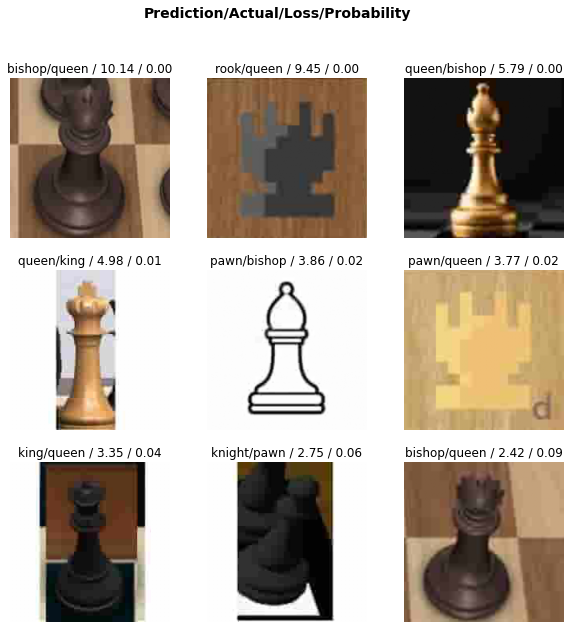

In [ ]:
## plot top losses (most wrong)
interp.plot_top_losses(9, figsize=(10,10))

In [ ]:
## backup the best model yet
# learn_pieces.save('p_model_50_bestfit', return_path=True) #  0.020304	0.228946	0.065744

PosixPath('drive/My Drive/ChessProject/Classifier/Pieces/models/p_model_50_bestfit.pth')

**Train Color Model**

In [13]:
## create cnn_learner object
learn_colors = cnn_learner(colors_data, models.resnet50, metrics=error_rate)

In [ ]:
## train 30 epochs of the model 
learn_colors.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.002102,0.319087,0.047059,00:07
1,0.005042,0.314499,0.047059,00:07
2,0.003762,0.317701,0.047059,00:07
3,0.006423,0.285504,0.047059,00:07
4,0.007718,0.244051,0.047059,00:07
5,0.010862,0.228006,0.035294,00:07
6,0.010828,0.217924,0.035294,00:07
7,0.009162,0.218472,0.035294,00:07


In [ ]:
## save model
learn_colors.save('c_model1_50', return_path=True) # 0.009162	0.218472	0.035294

PosixPath('drive/My Drive/ChessProject/Classifier/Colors/models/c_model1_50.pth')

In [ ]:
## unfreeze model. Lets you train earlier layers. 
learn_colors.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


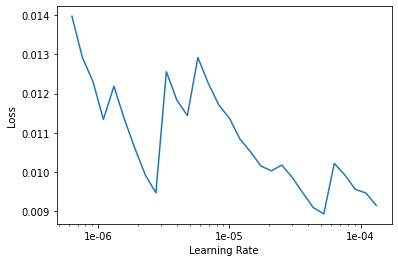

In [ ]:
learn_colors.lr_find()  
learn_colors.recorder.plot()

In [ ]:
## fit whole model with new learning rates 
learn_colors.fit_one_cycle(2, max_lr=slice(1e-6,8e-5), wd=.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.014785,0.215485,0.047059,00:09
1,0.008917,0.217886,0.035294,00:09


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


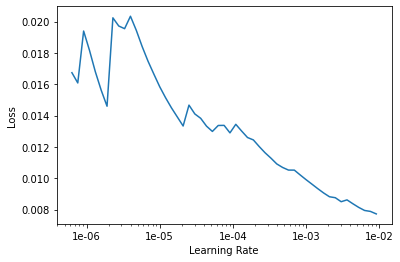

In [ ]:
learn_colors.freeze()
learn_colors.lr_find()
learn_colors.recorder.plot()

In [ ]:
learn_colors.save('c_model2_50', return_path=True) #0.013178	#na#	00:06

PosixPath('drive/My Drive/ChessProject/Classifier/Colors/models/c_model2_50.pth')

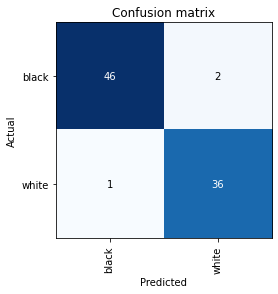

In [14]:
learn_colors.load('c_model_50_bestfit'); #the best one yet
# learn_colors.load('c_model1_50');
# learn_colors.load('c_model2_50');

## plot results of model on validation set 
interp = ClassificationInterpretation.from_learner(learn_colors);
interp.plot_confusion_matrix();

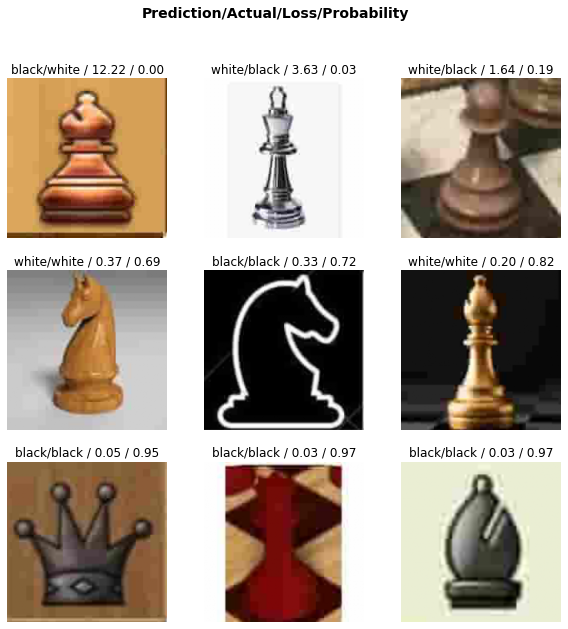

In [15]:
## plot top losses (most wrong)
interp.plot_top_losses(9, figsize=(10,10))

In [ ]:
## backup the best one yet
# learn_colors.save('c_model_50_bestfit', return_path=True) # 0.009162	0.218472	0.035294

PosixPath('drive/My Drive/ChessProject/Classifier/Colors/models/c_model_50_bestfit.pth')

**Predicting test cases:**

In [ ]:
import os
import math
import matplotlib.image as mpimg

## Function to loop through all images from received folder, predict the peices and show the predictions
def showAndPredictFromFolder(folder_name):
  images = []
  titles = []
  for filename in os.listdir(Path(root_path)/folder_name):
    p = Path(root_path)/folder_name/filename
    img_fa = open_image(p)
    img_mp = mpimg.imread(p)
    pred_piece,pred_idx,outputs = learn_pieces.predict(img_fa)
    pred_color,pred_idx,outputs = learn_colors.predict(img_fa)

    images.append(img_mp)
    titles.append(pred_color.obj + " " + pred_piece.obj)

  n_images = len(images)
  n_col = 4
  n_row = math.ceil(n_images/n_col)

  _, axs = plt.subplots(n_row, n_col, figsize=(n_col *2, n_row *2))
  axs = axs.flatten()
  for img,title, ax in zip(images, titles, axs):
      ax.set_title(title)
      ax.imshow(img)
      ax.set_axis_off()
  plt.show()



**3D chess set from online chess site**



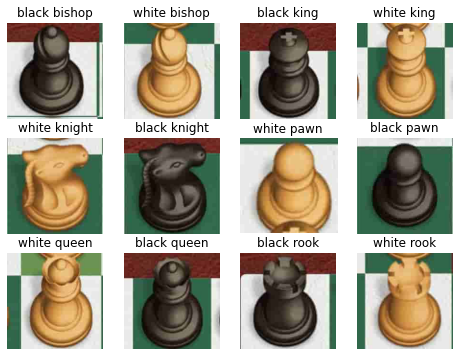

In [ ]:
showAndPredictFromFolder('TestSets/test1')

**2D chess set from online chess site**

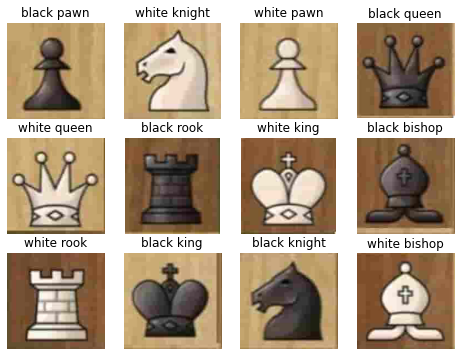

In [ ]:
showAndPredictFromFolder('TestSets/test2')

**Pawn Variations**

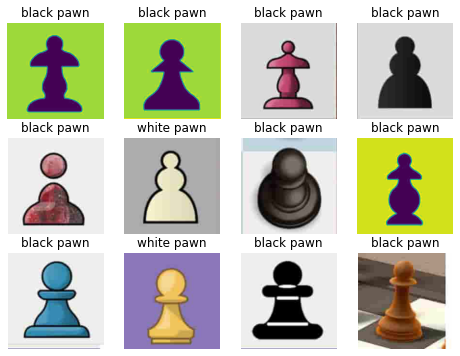

In [ ]:
showAndPredictFromFolder('TestSets/test3')

**Bishop Variations**

In [ ]:
# showAndPredictFromFolder('TestSets/test4')

**Knight Variations**

In [ ]:
# showAndPredictFromFolder('TestSets/test5')

**Rook Variations**

In [ ]:
# showAndPredictFromFolder('TestSets/test6')

**King Variations**

In [ ]:
# showAndPredictFromFolder('TestSets/test7')

**Queen Variations**

In [ ]:
# showAndPredictFromFolder('TestSets/test8')